In [18]:
import numpy as np

In [59]:
arr = np.array([
	[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
	[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
	[1.2, 2.1, 3.1, 4.1, 5.0, 6.0, 7.0, 8.0, 9.1, 10.21]
]).T
np.linalg.inv(np.dot(arr.T,arr))


array([[  0.65898838,   1.76289526,  -1.83746861],
       [  1.76289526,  17.41679576, -17.47989105],
       [ -1.83746861, -17.47989105,  17.55543261]])

In [60]:
np.linalg.cond(arr)

np.float64(166.24654771494986)

In [ ]:
#Slighest change in input cause the output of multicolliner data to change significantly also 
# we can note the standard error are very high.
arr = np.array([
	[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
	[1.1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
	[1.2, 2.1, 3.1, 4.1, 5.0, 6.0, 7.0, 8.0, 9.1, 10.21]
]).T
np.linalg.inv(np.dot(arr.T,arr))

array([[  0.56717254,   1.41202253,  -1.47776683],
       [  1.41202253,  23.01757512, -22.97775693],
       [ -1.47776683, -22.97775693,  22.95022533]])

In [62]:
#Non multicoliner data points; less standard error
arr = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
]).T

np.linalg.inv(np.dot(arr.T,arr))

array([[ 0.99764777, -0.54445115,  0.16254524],
       [-0.54445115,  0.4420386 , -0.14626055],
       [ 0.16254524, -0.14626055,  0.04975875]])

In [63]:
np.linalg.cond(arr)

np.float64(61.66335235039122)

In [17]:
#Changing the data slightly doesnot affect much
arr = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    [9, 3, 5, 7, 11, 13, 17, 19, 23, 29]
]).T
np.linalg.inv(np.dot(arr.T,arr))

array([[ 0.46923627, -0.08074943,  0.00550629],
       [-0.08074943,  0.08930206, -0.03017735],
       [ 0.00550629, -0.03017735,  0.0117992 ]])

In [22]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
data = pd.read_csv(url, index_col=0)

In [30]:
data = data.reset_index()
data = data.dropna()
#drop categorical column named `Ocean Proximity`
data = data.drop(columns=['ocean_proximity'])

In [31]:
data.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [32]:

# Define the independent variables (add a constant for the intercept)
X = data[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']]
X = sm.add_constant(X)

# Define the dependent variable
y = data['median_house_value']
# Fit the model using the independent and dependent variables
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     4478.
Date:                Sat, 29 Nov 2025   Prob (F-statistic):               0.00
Time:                        16:41:25   Log-Likelihood:            -2.5682e+05
No. Observations:               20433   AIC:                         5.137e+05
Df Residuals:                   20424   BIC:                         5.137e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -3.585e+06   6.29

In [33]:
import seaborn as sns

<Axes: >

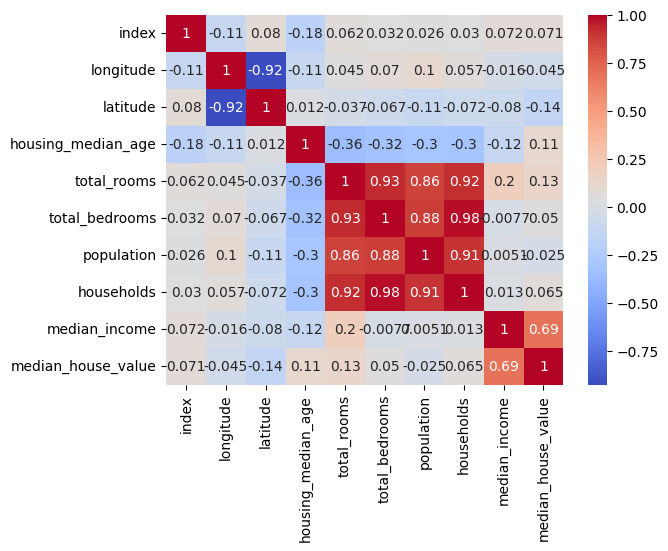

In [35]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

### Variance Inflation Factor (VIF)

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [47]:
vif = []
for i in range(X.shape[1]):
    vif.append(variance_inflation_factor(X.values, i))

In [48]:
# Show VIF values for each feature
for i, col in enumerate(X.columns):
    print(f"{col}: {vif[i]}")

const: 16702.386835448753
longitude: 8.71374033592162
latitude: 8.828919149417054
housing_median_age: 1.2600149682715465
total_rooms: 12.716999781630241
total_bedrooms: 36.00372596484954
population: 6.371238126210164
households: 35.13604482140061
median_income: 1.731510924365605


## VIF greater than 10 indicates high multicollinearity

In [51]:
## Conditioning Number
import numpy as np
mat = np.array([[1, 2, 3],
                [4, 4, 6],
                [1, 6, 9]])

cond_num = np.linalg.cond(mat)
print(f"Condition Number: {cond_num}")

Condition Number: 2.838558354220364e+16


In [53]:
## Conditioning Number
import numpy as np
mat = np.array([[1, 2, 3],
                [2, 4, 6],
                [3, 6, 9.1]])

cond_num = np.linalg.cond(mat)
print(f"Condition Number: {cond_num}")

Condition Number: 1.8027444673967244e+16


In [78]:
# Removing Column to check if multicollinearity reduces
# Define the independent variables (add a constant for the intercept)
X = data[['longitude','housing_median_age','population','median_income']]
X = sm.add_constant(X)

# Define the dependent variable
y = data['median_house_value']

In [79]:
# Fit the model using the independent and dependent variables
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     5330.
Date:                Sat, 29 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:06:41   Log-Likelihood:            -2.5987e+05
No. Observations:               20433   AIC:                         5.197e+05
Df Residuals:                   20428   BIC:                         5.198e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1.259e+05    3.4

<Axes: >

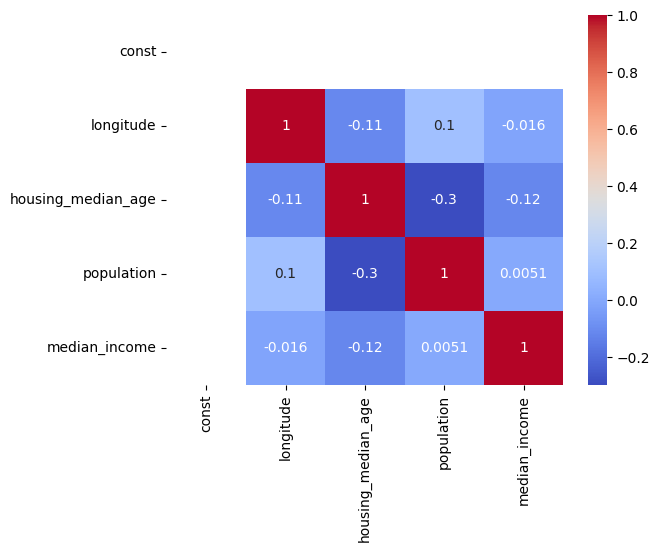

In [80]:
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')

In [81]:
vif = []
for i in range(X.shape[1]):
    vif.append(variance_inflation_factor(X.values, i))

In [82]:
for i, col in enumerate(X.columns):
    print(f"{col}: {vif[i]}")

const: 3621.489147697472
longitude: 1.0180343739593818
housing_median_age: 1.1208877293607549
population: 1.1024775261019448
median_income: 1.0159201974471657
